# 1. Some customers didn't write a review. But why are  they happy or dissatisfied?

In [1]:
import pandas as pd
pd.set_option('max_colwidth',200)
reviews = pd.read_csv('order_reviews.csv')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [2]:
reviews.shape,reviews.drop_duplicates().shape

((100000, 7), (100000, 7))

we got 100000 examples total with no duplicate examples

In [3]:
# get to know types of each columns
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [4]:
reviews['review_score'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [5]:
reviews['review_score'].describe()

count    100000.000000
mean          4.070890
std           1.359663
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [6]:
reviews.groupby('review_score')['review_id'].count()

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
Name: review_id, dtype: int64

In [7]:
reviews.groupby('review_score')['order_id'].count()

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
Name: order_id, dtype: int64

we got review_score range from 1 to 5 with a mean of 4;
1. 57420 customers give 5 score,19200 give 4 ,11858 give 1 score which we need to really focus their comment messages that leads to dissatisfied.
2. Then we got 8287 customers give 3 and 3235 give 2 score.
3. Suppose score 5 respond to be happy, and 1 respond to unsatisfied.

In [8]:
reviews.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15078,64051e79eebda59e87182f6bb4f2fd31,20e9f3d5d268869b86ccb6c13fec2dd0,5,NaN,NaN,2018-03-30 00:00:00,2018-04-01 00:44:25
29087,a531bab6cc7155e99d9720e9bcbc9414,d57be8fa0f204a8cf10389b3da1d2a3e,3,NaN,Solicitado cancelamento da compra pois foi feita em duplicidade.,2018-01-23 00:00:00,2018-01-25 20:28:48
10113,dfb5641d677f417fd254773453755c40,148ffca6d6b46bd5f71a7b22154baae6,5,NaN,Tudo de bom amoo vocês minhas compras de Natal só com vocês obrigada bjbj feliz natal a toda equipe bjbjbj ..,2017-12-11 00:00:00,2017-12-11 18:01:18
39719,5963a520a2b0cb17838bbec34fd6a796,ad4c9fc51e6080fe19b1e0a62752d55d,5,NaN,NaN,2017-12-05 00:00:00,2017-12-05 23:32:24
1299,f343ab4251768498d9fb89f25fc225e4,7b3f806a3a00dc7b0c3ab0dd548842ee,5,NaN,"produto ok, recebido dentro do prazo, bem antes do previsto.",2017-09-01 00:00:00,2017-09-02 15:19:23
9116,b098c8b3d65ff19f503f8ac3359d7ee8,a11cb431739ce0d512e8a8e96654722f,1,péssimo,"produto veio errado, fiz todo processo para fazer a troca. me deram 2 dias para me responder e nada. liguei e pediram para esperar. amanhã vence o prazo pra devolver ou trocar. vão me obrigar a ficar",2018-05-15 00:00:00,2018-05-20 17:12:25
23010,e78932c89eb04348a5722854410879ca,d75d54558f0639e487afa816d8c23927,5,NaN,NaN,2017-04-20 00:00:00,2017-04-20 21:34:42
27685,cf66fdd5cd6112f2901bc2c626327565,5ba14648d0bf31758b80a144887e42ca,5,NaN,NaN,2018-06-29 00:00:00,2018-07-01 10:57:12
80969,7bcf4ad8357025d506dee61cadef29f4,77bebd4675a69e173b4fc0b4cbc38ae4,1,NaN,Comprei 3 araras para roupas e foram entregues apenas 2.,2018-02-17 00:00:00,2018-02-20 18:06:13
57816,3531bd966fafb46c8911cc94aac89567,2105771f19af1ff52afe2a18c984c412,1,NaN,No dia 30/03/2017. foi entregue apenas (1) um pote do produto 'PRO Femina+E'.\r\nQuando o outro pote será entregue?\r\nPois eu fiz o pedido de (2) dois produtos.\r\nFico aguardando uma resposta!,2017-03-31 00:00:00,2017-04-01 04:47:14


let's take a look at 10 random sample examples.

1. we can see that both the 'review_comment_title'& 'review_comment_message' contains null values.
2. If we want to know why they are happy or dissatisfied,we need to take ['review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'] into consideration

In [9]:
reviews = reviews[['review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp']].drop_duplicates().dropna()

In [10]:
reviews.count()

review_score               9944
review_comment_title       9944
review_comment_message     9944
review_creation_date       9944
review_answer_timestamp    9944
dtype: int64

we got a review dataset of 9944 examples with no NaN values

In [11]:
reviews.dtypes

review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [12]:
reviews.head()

,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,4,recomendo,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00,2018-05-23 16:45:47
15,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes do prazo.",2018-05-23 00:00:00,2018-05-24 03:00:01
19,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,4,Muito bom.,"Recebi exatamente o que esperava. As demais encomendas de outros vendedores atrasaram, mas esta chegou no prazo.",2018-06-07 00:00:00,2018-06-09 18:44:02


1. I want to calculate the gap between 'review_creation_date' and 'review_answer_timestamp' to see their respond time.
2. And I think there might be some correlation between satisfaction and review respond time.

In [13]:
reviews.review_creation_date = pd.to_datetime(reviews.review_creation_date)
reviews.review_answer_timestamp = pd.to_datetime(reviews.review_answer_timestamp)
reviews['respond_time'] = (reviews.review_answer_timestamp - reviews.review_creation_date)                           

In [14]:
reviews.respond_time.describe()

count                       9944
mean      3 days 13:51:21.910901
std      12 days 00:26:42.135061
min              0 days 03:11:11
25%       0 days 23:54:49.500000
50%       1 days 17:39:33.500000
75%       3 days 09:23:05.250000
max            411 days 10:39:13
Name: respond_time, dtype: object

In [15]:
reviews.groupby('review_score')['respond_time'].get_group(5).min()

Timedelta('0 days 03:30:57')

In [16]:
reviews.groupby('review_score')['respond_time'].get_group(1).min()

Timedelta('0 days 03:21:40')

In [17]:
reviews.groupby('review_score')['respond_time'].get_group(5).max()

Timedelta('411 days 10:39:13')

In [18]:
reviews.groupby('review_score')['respond_time'].get_group(1).max()

Timedelta('310 days 12:24:27')

In [19]:
reviews.groupby('review_score')['respond_time'].get_group(5).mean()

Timedelta('3 days 13:36:07.590206')

In [20]:
reviews.groupby('review_score')['respond_time'].get_group(1).mean()

Timedelta('3 days 21:52:17.946091')

In [21]:
reviews.groupby('review_score')['respond_time'].get_group(5).std()

Timedelta('12 days 10:41:15.210437')

In [22]:
reviews.groupby('review_score')['respond_time'].get_group(1).std()

Timedelta('15 days 01:52:24.451110')

1. we can see that the shortest respond time is 3:11:11, longest is 411 days 10:39:13,Q1:0 days 23:54:49.50,Q2:1 days 17:39:33.50,Q3:3 days 09:23:05.25
2. If we check the min,max,mean,std of 5 score group and 1 score group, we can see that there isn't much differece between them.
3. Anyway, time respond is not so correlated with our first question. Let's continue

In [52]:
# let's take a sample of comment title with all the customers give 5 score(our happy customers)
reviews.groupby('review_score')['review_comment_title'].get_group(5).sample(10)

81360    super recomendo
90240    Entrega rápida 
57361          Excelente
34198          Recomendo
90329          excelente
39337              otimo
87598         Lindíssimo
11870          Recomendo
48515             Ótimo 
88275          Recomendo
Name: review_comment_title, dtype: object

In [53]:
# let's also take a sample of 10 of the unhappy customers who give 1 score
reviews.groupby('review_score')['review_comment_title'].get_group(1).sample(10)

59964    nao recebi o produto
89802     Produto veio errado
31103    Produto não entregue
65525     Produto com defeito
23992            NAO ENTREGUE
74183            Produto ruim
85813    Nem NF foi emitida!!
33813       QUERO MEU PRODUTO
65135     Cancelaram a compra
68541             Não gostei.
Name: review_comment_title, dtype: object

1. Since I don’t understand Portuguese，I use google translator to get a common sense of the title meanings.
2. We can see that those 5 score customer give 'recomendo'/'Excelente'/'Ótimo ' which means excellent;
3. The title of 1 score:
    'nao recebi o produto/NAO ENTREGUE':don't receive the item
    'Produto veio errado/Produto com defeito/Produto ruim': item got quality problems
    'Nem NF foi emitida!!': the item doesn't even been shipped
    'Cancelaram a compra':order canceled
4. To sum up above, we know that 5 score review customers give good comments, but 1 score customers have different reasons to give bad reviews.
5. But we still don't know why they are happy with their purchase

In [55]:
reviews.groupby('review_score')['review_comment_message'].get_group(5).sample(10)

96191                                                               Eu só compro neste site tenho segurança ok
78011                                                                                               Satisfação
51262                                 Muito bom! Compra tranquila, Entrega super rápida. Recomendo para todos!
15126                                                                                              Muito bom. 
97769                                                                                      Tecnologia japonesa
92847                                                                 Entregaram antes do prazo estipulado....
61405                                                     Produto de ótima qualidade chegou bem antes do prazo
10881                                                                                                   Ótimo 
40697                                                   muito bem foi entregue antes da data estão de parabens
9

we can see from happy customers who give 5 score(why they are happy),
1. 'Eu só compro neste site tenho segurança ok': they feel secure when they purchase online
2. 'Muito bom! Compra tranquila, Entrega super rápida. Recomendo para todos!': quick delivery 
3. 'Tecnologia japonesa': prefer japanses technology
3. 'Entregaram antes do prazo estipulado': delivered before expire date
4. 'Produto de ótima qualidade chegou bem antes do prazo':good quality item and arrived before expected date
6. 'muito bem foi entregue antes da data estão de parabens': get the item before his/her congratulation date
7. 'Rapida entrega, mesmo sem gqsolina nos postos, recomendo 100%, continuem assim pois estao de parabens': delivered in time even when the shipping cars with no gasoline(I guess?)

Almost all the sample customers think that the delivery service is good with good quality!

In [56]:
reviews.groupby('review_score')['review_comment_message'].get_group(1).sample(10)

39468                                                                                                                                        Não recebi o produto nem retorno do questionamento sobre o mesmo...
86261                                                                                                                          Não foi o produto que comprei pelas lannister, recebi duas extensões de cabo HDI.
73866    Bem comprei esse quadro pela targaryen,e solicitei troca imediatamente,quadro parecido com o do anúncio no entanto apresenta impressão sem qualidade,sem foco imagem trêmula,o material da tela terr...
34891                     Fiquei muito triste pq pedi um relógio, não tinha cancelei meu pedido e mesmo assim mandaram outro.Detalhe já tinha dito que não queria outro modelo,resumindo pedi extorno de cartão.
3339                                                                                                                                                Produto não func

we can see from unsatisfied customers who give 1 score(why they are dissatisfied),
1. 'Não recebi o produto nem retorno do questionamento sobre o mesmo': don't get the item
2. 'Não recebi o produto nem retorno do questionamento sobre o mesmo':don't get what he/she wants, get sth else
3. 'Bem comprei esse quadro pela targaryen,e solicitei troca imediatamente,quadro parecido com o do anúncio no entanto apresenta impressão sem qualidade,sem foco imagem trêmula,o material da tela terr':
    the item's quality is not good(I guess?)
4. 'Fiquei muito triste pq pedi um relógio, não tinha cancelei meu pedido e mesmo assim mandaram outro.Detalhe já tinha dito que não queria outro modelo,resumindo pedi extorno de cartão':
    feel sad since he/she wants to cancel the order, but the item still been shipped
5. 'Produto não funciona aparentemente o produto não é original': can't work properly,not original
6. 'nao recebi minha compra':don't receive the item
7. 'Péssimo atendimento. Nao me deram nem explicações para este 1 MÊS de atraso. Nunca mais faço compras pela lannister':service is not good,since he/she get the item 1 month late and get no explanations.
8. 'Está mercadoria foi pedida duas vezes por engano. Pedi o cancelamento de um deles, porém não foi efetivado e não me deram resposta. Resultado estou com 6 peças idênticas do produto':
    make wrong orders but cannot cancel them
9. 'O PRODUTO VEIO COM DEFEITO E NÃO ME DEVOLVEM O DINHEIRO. CANCELEI O PEDIDO, DEPOIS DO RECEIBIMENTO, DENTRO DOS 2 DIAS UTEIS E ATÉ AGORA NÃO FUI ATENDIDO':
    defective item, make return request with no acception
10. 'produto ainda não chegou':don't receive the itme    

To sum up, unsatisfied customer who give 1 score got situation like:don't receive item,can't cancel wrong orders,want to return item with no acception, bad quality.

If we keep doing sampling like this for several times,
we can almost (not 100%,but really closely) get to know why people are happy or not.

To get a even broad view,
We can extract key words from their comment messages to get a statistical view.
Use workcloud package to generate a term frequency table.

In [24]:
score_5 = reviews.groupby('review_score')['review_comment_message'].get_group(5)

In [46]:
list(score_5)

['Vendedor confiável, produto ok e entrega antes do prazo.',
 'Loja nota 10',
 'Recomendo ,',
 'Tô completamente apaixonada, loja super responsável e confiável!',
 'Muito bom. muito cheiroso.',
 'MT lindo',
 'Recomendo o vendedor... ',
 'O kit mochila patrulha canina é lindo!! Meu netinho vai amar!! Obrigada!!',
 'Super rápido.',
 'OK RECOMENDO',
 'Gostei da atenção com a entrega',
 'Espero receber esta semana, o que não seria tão extravagante, porém...mais atrazo do que isso me faria desistir do baratheon.',
 'Muito bom alta qualidade!',
 'chegou dentro do prazo e o produto é de excelente qualidade! Acabou as dores nas costas, estou dormindo muito bem!',
 'Recomendo',
 'super recomendo produto profissional de qualidade',
 'muito bom e rapido quando vi ja tinha chegado',
 'Entregue dentro do prazo, e com bom período de validade.',
 'produto de qualidade e eficiência na entrega. recebi muito antes do combinado. recomendo',
 'Produto bom veio no dentro do prazo chegou em 08 dias estão de

(-0.5, 399.5, 199.5, -0.5)

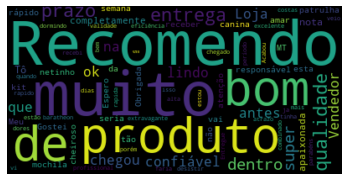

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = open('score_5.csv',encoding='ibm860').read()
wc = WordCloud().generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")

In [51]:
score_1 = reviews.groupby('review_score')['review_comment_message'].get_group(1)

In [52]:
list(score_1)

['Péssimo',
 'A peça não serviu',
 'Faltou 1 produto e os que recebi 1 veio quebrado',
 'aqui está descrevendo como entregue só que ate agora não recebi',
 'Cancelaram a minha compra um dia antes da entrega, liguei para a lannister e os atendentes não sabiam o que estava acontecendo, uma bagunça, agora estou esperando para ver se vai ser cobrado',
 'Boa Noite\r\n\r\né lamentável, esta loja que tantas compras eu ja fiz e hoje não me da satisfação sequer de um relógio na importância de 50,00 reais ... um produto com defeito e até agora não me deu retor',
 'Quando instalei o cartucho de tinta, a minha impressora indicou que o mesmo estava vazio, e apresentou a mensagem de erro "!" em cima do marcador de nível da tinta. Já solicitei a troca. ',
 'Cortina de plástico, na foto parece tecido desenho diferente cores morta apagadas, uma verdadeira porcaria, não recomendo ninguém compra decepção total ',
 'PRODUTO JA CHEGOU COM DEFEITO NÃO FUCIONOU CONFORME MINHA NECESSIDADE DE USO. INFELIZMENTE

In [53]:
score_1.to_csv('score_1.csv',index=None)

C:\Users\flyod\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


(-0.5, 399.5, 199.5, -0.5)

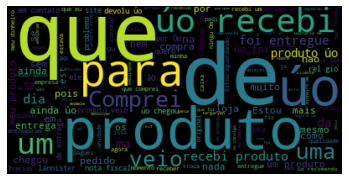

In [54]:
text = open('score_1.csv',encoding='ibm860').read()
wc = WordCloud().generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")

bigger words mean high frequency.
we can see that in score_5,we got words:Recomendo,muito,bom,de produto
    in score_1,we got words:que,para,de,uo,recebi,um,produto,veio
we can see that most of them are words that can be removed,we still don't know the reasons why customers are happy or not,
due to time limit, I'm gonna stop here,but we can still move on to do things like remove the meaningless stop words,
and then repeat the above steps to see if it helps or not

# 2.With purchase date information, predict the future sales information. What is the expected Revenue for 2019? What are the factors that you might want to influence which may increase revenue in 2019? 

we got 3 problems here,
let's solve them one by one

## predict the future sales information

In [1]:
import pandas as pd 
order_payment = pd.read_csv('order_payments.csv')

In [2]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,2,56.10
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,2,151.13
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,16,247.89
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,4,295.44


In [3]:
order_payment.shape

(103886, 5)

In [4]:
order = pd.read_csv('orders.csv')

In [5]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order.shape

(99441, 8)

we need to merge order_payment with order to get a dataframe we can use to predict future sales information

In [7]:
sales = pd.merge(order_payment,order,on='order_id',how='inner')

In [8]:
sales.shape

(103886, 12)

In [9]:
sales.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,2,56.10,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,2,151.13,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,16,247.89,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,4,295.44,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [10]:
sales.dtypes

order_id                          object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
dtype: object

convert ['order_purchase_timestamp','order_approved_at',
         'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'] to datetime format

In [11]:
sales.order_purchase_timestamp= pd.to_datetime(sales.order_purchase_timestamp)
sales.order_approved_at= pd.to_datetime(sales.order_approved_at)
sales.order_delivered_carrier_date=pd.to_datetime(sales.order_delivered_carrier_date)
sales.order_delivered_customer_date=pd.to_datetime(sales.order_delivered_customer_date)
sales.order_estimated_delivery_date=pd.to_datetime(sales.order_estimated_delivery_date)

In [12]:
sales.dtypes

order_id                                 object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [13]:
sales = sales.drop_duplicates().dropna()

In [14]:
sales['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

I suppose sales only include payment_value when order_status == delievered

In [15]:
sales_delivered = sales[sales.order_status =='delivered']

In [16]:
sales_delivered.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,2,56.10,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,2,151.13,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,16,247.89,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,4,295.44,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13


select ['order_purchase_timestamp','payment_value'] to generate the final sales dataframe

In [17]:
sales_final = sales_delivered[['order_purchase_timestamp','payment_value']]

In [18]:
sales_final.sort_values('order_purchase_timestamp').head()

,order_purchase_timestamp,payment_value
167,2016-10-03 09:44:50,104.56
29945,2016-10-03 16:56:50,89.91
2177,2016-10-03 21:13:36,123.58
43722,2016-10-03 22:06:03,306.96
49099,2016-10-03 22:31:31,94.19


you can see that I treat this sales prediction problem like a time_series prediction problem

In [19]:
#sales_final.to_csv('sales.csv',index=None,header=True)

If you take a look at the sales.csv dataset, 
you will see that we got a time range from (2016-10-03 09:44:50 ~ 2016-10-10 18:09:39)
then it jumps to 2016-12-23 23:16:47,so we got a gap here which is not good for prediction.
thus we need to delete date locate in 2016.
Then we got 2017 and 2018 two years daily data to do the sales prediction.

In [20]:
sales_locate = sales_final[sales_final.order_purchase_timestamp.dt.year > 2016]

In [21]:
sales_locate.sort_values('order_purchase_timestamp').head()

,order_purchase_timestamp,payment_value
18862,2017-01-05 11:56:06,45.13
73704,2017-01-05 12:01:20,45.13
78155,2017-01-05 12:06:36,26.73
16644,2017-01-05 12:09:08,38.23
22720,2017-01-05 12:11:23,42.83


now we've relocate the time range, but the order_purchase_timestamp is too precise for us to use(up to seconds),
Here I decide to make the order_purchase_timestamp precision up to days

In [22]:
sales_locate['daily'] = sales_locate.order_purchase_timestamp.apply(lambda x: str(x)[:10])

/home/ian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
sales_locate.head()

,order_purchase_timestamp,payment_value,daily
0,2018-04-25 22:01:49,228.46,2018-04-25
1,2018-06-26 11:01:38,56.10,2018-06-26
2,2017-12-12 11:19:55,151.13,2017-12-12
3,2017-12-06 12:04:06,247.89,2017-12-06
4,2018-05-21 13:59:17,295.44,2018-05-21


In [24]:
sales_daily = sales_locate[['daily','payment_value']]

In [25]:
sales_daily.sort_values('daily').head()

,daily,payment_value
74748,2017-01-05,45.13
16644,2017-01-05,38.23
50120,2017-01-05,45.13
99813,2017-01-05,42.83
42382,2017-01-05,211.42


In [26]:
daily_sales = pd.DataFrame(sales_daily.groupby('daily')['payment_value'].sum().reset_index())

In [27]:
daily_sales.head()

,daily,payment_value
0,2017-01-05,1626.85
1,2017-01-06,2273.04
2,2017-01-07,3330.38
3,2017-01-08,1168.06
4,2017-01-09,1781.39


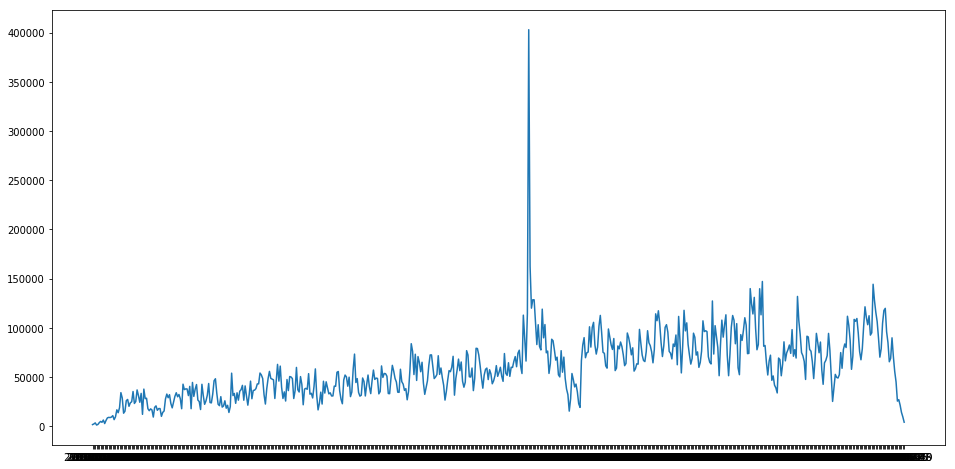

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(daily_sales.daily,daily_sales.payment_value)
plt.show()

we can see that overall, the sales increase slowly by time,
got a drop tendency at the tail part,I guess it's in 2018(can't see the time clearly at the bottom)

Below,I use fbprophet to predict the sales in the future.
I use seasonality_mode='multiplicative' to catch the fluctuation 
since the fluctuation is increasing by time.

In [ ]:
daily_sales.columns = ['ds','y']

In [37]:
from fbprophet import Prophet
m = Prophet(seasonality_mode='multiplicative')
m.fit(daily_sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


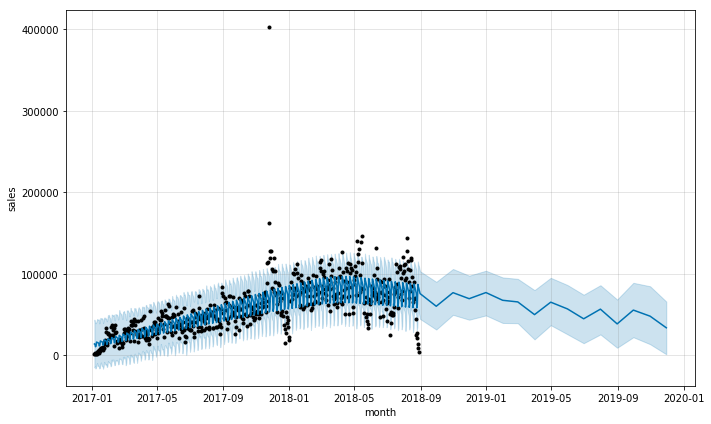

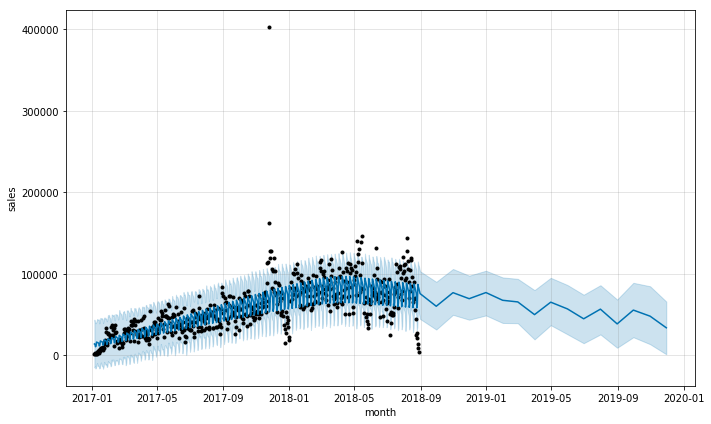

In [38]:
future_sale = m.make_future_dataframe(periods=16,freq='M')
forecast_sale = m.predict(future_sale)
m.plot(forecast_sale,xlabel='month',ylabel='sales')

The trend in a real time series can change abruptly.
Prophet attempts to detect these changenges automatically using a Laplacian or double exponential prior.
By default, the change points are only
fitted for the 1st 80% of the time series, allowing sufficient runway for the actual forecast.

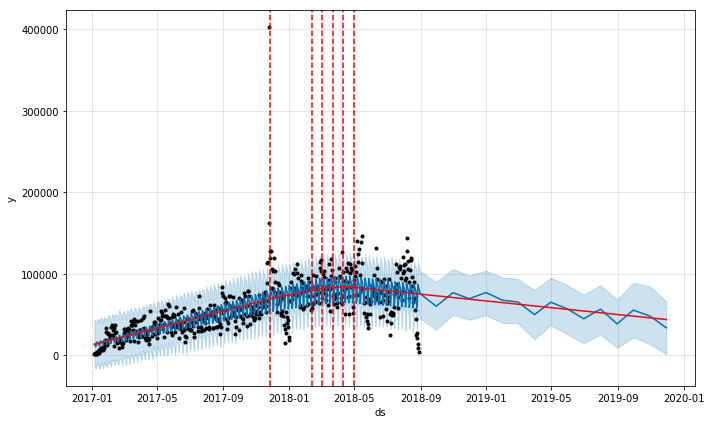

In [40]:
#let's display the change points detected by Prophet
from fbprophet.plot import add_changepoints_to_plot
fig_sale = m.plot(forecast_sale)
a = add_changepoints_to_plot(fig_sale.gca(),m,forecast_sale)

Visually it appears that the general trend is correct but it is being underfit.
To adjust the trend change, we can use the
parameter changepoint_prior_scale which is set to 0.05 by default. Increasing its value would make
the trend more flexible and reduce underfitting, at the risk of overfitting.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


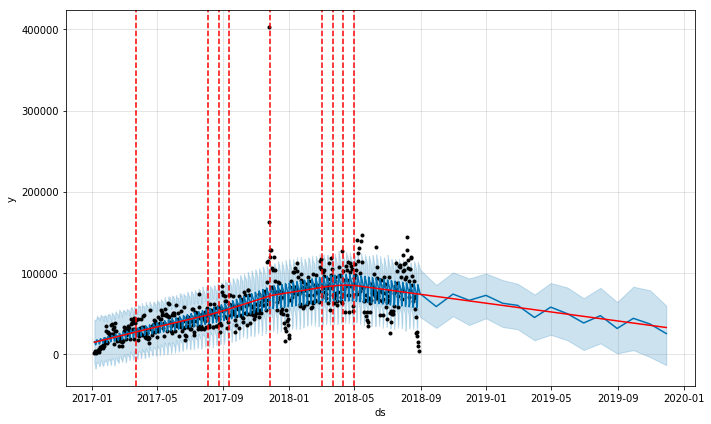

In [45]:
m = Prophet(seasonality_mode='multiplicative',changepoint_prior_scale=0.1)
forecast_sale = m.fit(daily_sales).predict(future_sale)
fig_sale = m.plot(forecast_sale)
a = add_changepoints_to_plot(fig_sale.gca(),m,forecast_sale)

we can see that more changepoints have been detected.
Then we can conclude that the sales of 2019 might be dropped a little bit compare to 2018

## What is the expected Revenue for 2019?

the second problem is to predict the Revenue.
I suppose revenue = sales - freight_value-price.
Let's merge the dataset we want to use first.

In [1]:
import pandas as pd 

In [2]:
order_payment = pd.read_csv('order_payments.csv')
order_items = pd.read_csv('order_items.csv')
order = pd.read_csv('orders.csv')

In [3]:
tmp = pd.merge(order_payment,order_items,on='order_id',how='inner')

In [4]:
revenue = pd.merge(tmp,order,on='order_id',how='inner')

In [5]:
revenue.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,5/2/2018 22:15,183.540,25.389,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,2,56.10,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,7/2/2018 11:18,39.100,9.607,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,2,151.13,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,12/26/2017 9:52,131.077,11.336,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,16,247.89,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,12/12/2017 12:13,206.770,23.244,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,4,295.44,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,5/31/2018 16:14,261.211,19.344,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [6]:
revenue = revenue[['payment_value','price','freight_value','order_status','order_purchase_timestamp']]

I choose 'order_purchase_timestamp' as my time index together with order_status == 'delivered' 
which indicate revenue generates immediately.

In [7]:
revenue = revenue[revenue.order_status == 'delivered'].drop_duplicates().dropna()

I suppose revenue = payment_value - price

In [8]:
revenue['revenue'] = revenue.payment_value - revenue.price

In [9]:
revenue.head()

,payment_value,price,freight_value,order_status,order_purchase_timestamp,revenue
0,228.46,183.540,25.389,delivered,2018-04-25 22:01:49,44.920
1,56.10,39.100,9.607,delivered,2018-06-26 11:01:38,17.000
2,151.13,131.077,11.336,delivered,2017-12-12 11:19:55,20.053
3,247.89,206.770,23.244,delivered,2017-12-06 12:04:06,41.120
4,295.44,261.211,19.344,delivered,2018-05-21 13:59:17,34.229


In [10]:
revenue['revenue'].describe()

count    103158.000000
mean         75.130401
std         236.282317
min       -8656.190000
25%          29.970000
50%          39.120000
75%          60.190000
max       27563.380000
Name: revenue, dtype: float64

In [12]:
revenue = revenue[['order_purchase_timestamp','revenue']].drop_duplicates().drop_duplicates().dropna()

In [13]:
revenue.head()

,order_purchase_timestamp,revenue
0,2018-04-25 22:01:49,44.920
1,2018-06-26 11:01:38,17.000
2,2017-12-12 11:19:55,20.053
3,2017-12-06 12:04:06,41.120
4,2018-05-21 13:59:17,34.229


In [16]:
revenue.dtypes

order_purchase_timestamp     object
revenue                     float64
dtype: object

In [17]:
revenue.order_purchase_timestamp = revenue.order_purchase_timestamp.apply(lambda x: str(x)[:10])

In [18]:
revenue.order_purchase_timestamp = pd.to_datetime(revenue.order_purchase_timestamp)

In [19]:
# we also need to filter out 2016 revenue because time gap problem
revenue = revenue[revenue.order_purchase_timestamp.dt.year > 2016]

In [20]:
revenue.sort_values('order_purchase_timestamp').head()

,order_purchase_timestamp,revenue
21268,2017-01-05,20.06
19485,2017-01-05,36.92
71363,2017-01-05,20.06
14620,2017-01-05,20.06
51740,2017-01-05,20.06


In [21]:
daily_revenue = pd.DataFrame(revenue.groupby('order_purchase_timestamp')['revenue'].sum().reset_index())

In [22]:
daily_revenue.head()

,order_purchase_timestamp,revenue
0,2017-01-05,713.980
1,2017-01-06,-3680.234
2,2017-01-07,1138.710
3,2017-01-08,133.566
4,2017-01-09,320.223


/home/ian/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


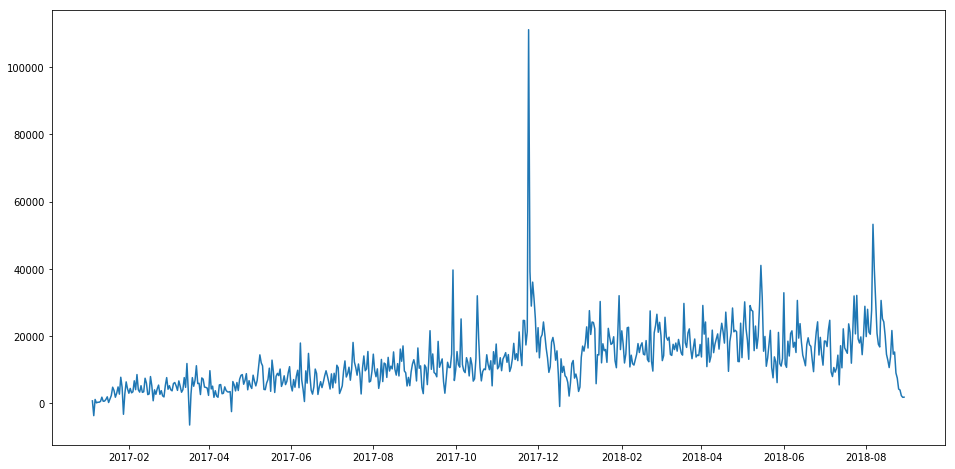

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(daily_revenue.order_purchase_timestamp,daily_revenue.revenue)
plt.show()

we can see that the daily revenue got a show increase tendency by time.
I'm gonna use the same prediction method just like predict the sales

In [24]:
daily_revenue.columns = ['ds','y']

In [25]:
from fbprophet import Prophet
m = Prophet(seasonality_mode='multiplicative')
m.fit(daily_revenue)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


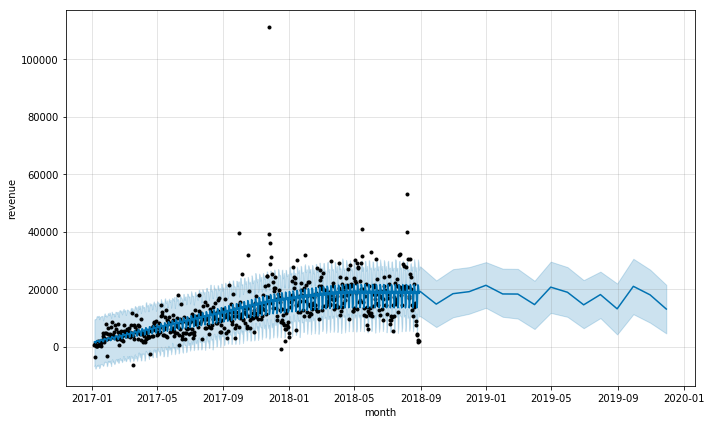

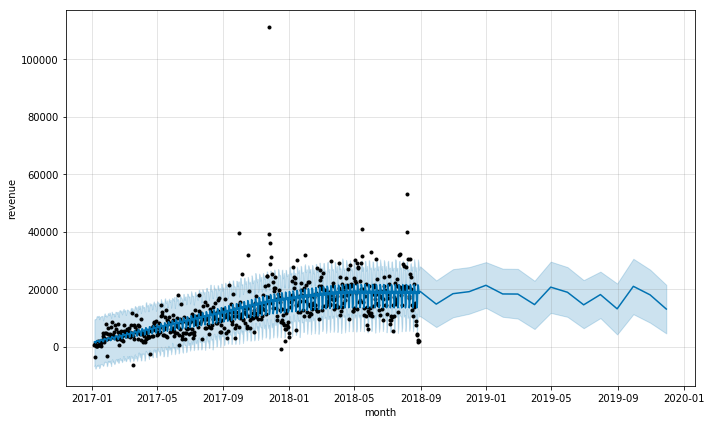

In [26]:
future_revenue = m.make_future_dataframe(periods=16,freq='M')
forecast_revenue = m.predict(future_revenue)
m.plot(forecast_revenue,xlabel='month',ylabel='revenue')

In [27]:
forecast_revenue_2019 = forecast_revenue[forecast_revenue.ds.dt.year>2018]

In [28]:
forecast_revenue_2019 = forecast_revenue_2019[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [29]:
forecast_revenue_2019

,ds,yhat,yhat_lower,yhat_upper
607,2019-01-31,18333.644982,10389.643660,27131.504151
608,2019-02-28,18301.869557,9773.573153,27068.466986
609,2019-03-31,14635.486703,6131.814110,22911.378626
610,2019-04-30,20701.450839,11754.546246,29579.742079
611,2019-05-31,18921.373239,10374.230363,27675.825930
612,2019-06-30,14552.745458,6410.331921,23146.658198
613,2019-07-31,18119.724014,9943.664178,26106.408607
614,2019-08-31,13161.001487,4258.289262,21968.839627
615,2019-09-30,20987.332019,11296.756469,30564.416766
616,2019-10-31,18023.834587,8343.267356,26804.725064


In [30]:
forecast_revenue_2019.yhat.sum()

188824.34505073607

In [31]:
forecast_revenue_2019.yhat_lower.sum()

93288.04060041114

In [32]:
forecast_revenue_2019.yhat_upper.sum()

284456.92246982164

so here we got the predicted 2019 revenue 188824.34
and with a range [93288.04,284456.92]

## What are the factors that you might want to influence which may increase revenue in 2019?

the third question is to find correlation between revenue and columns that contained in each csv file.
we still need to merge our dataframe first

In [51]:
import pandas as pd 
order_payment = pd.read_csv('order_payments.csv')
order_items = pd.read_csv('order_items.csv')
order = pd.read_csv('orders.csv')
products =pd.read_csv('products.csv')
product_category_name = pd.read_csv('product_category_name.csv')

tmp = pd.merge(order_payment,order_items,on='order_id',how='inner')
tmp = pd.merge(tmp,order,on='order_id',how='inner')
tmp = pd.merge(tmp,products,on='product_id',how='inner')
tmp = pd.merge(tmp,product_category_name,on='product_category_name',how='inner')

In [52]:
tmp.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,5/2/2018 22:15,183.540,...,2018-05-22 00:00:00,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,8,215.56,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,4/19/2018 23:10,183.540,...,2018-05-09 00:00:00,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
2,b545ba7b0bd67a3128185c7214704319,1,credit_card,16,782.18,1,2233b59e8cf2817f9659e52cce3093de,e3d3b3efac954a60d61be70b7e05b49b,6/15/2018 15:20,726.915,...,2018-07-04 00:00:00,casa_construcao,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,home_construction
3,6a26bd1a037993f1205073dbeda67db4,1,credit_card,4,154.38,1,679a3e5e1d2bb68982be5734c6e55e63,8a130737016f838139d31878787a39c9,2/21/2018 13:10,125.120,...,2018-03-08 00:00:00,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
4,1d84d00f6d2334d63f35ba528cd0d99d,1,boleto,2,146.60,1,679a3e5e1d2bb68982be5734c6e55e63,8a130737016f838139d31878787a39c9,2/22/2018 6:56,125.120,...,2018-02-26 00:00:00,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction


In [53]:
tmp.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [54]:
tmp.drop(['order_id','order_item_id','product_id','seller_id','customer_id'],axis=1,inplace=True)

In [55]:
tmp.head()

,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1,credit_card,16,228.46,5/2/2018 22:15,183.540,25.389,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,...,2018-05-22 00:00:00,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,1,credit_card,8,215.56,4/19/2018 23:10,183.540,18.096,delivered,2018-04-15 22:53:59,2018-04-15 23:10:32,...,2018-05-09 00:00:00,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
2,1,credit_card,16,782.18,6/15/2018 15:20,726.915,31.239,delivered,2018-06-11 14:59:24,2018-06-11 16:31:42,...,2018-07-04 00:00:00,casa_construcao,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,home_construction
3,1,credit_card,4,154.38,2/21/2018 13:10,125.120,16.536,delivered,2018-02-15 13:53:42,2018-02-15 14:10:28,...,2018-03-08 00:00:00,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction
4,1,boleto,2,146.60,2/22/2018 6:56,125.120,12.142,delivered,2018-02-10 16:50:42,2018-02-16 07:56:27,...,2018-02-26 00:00:00,casa_construcao,57.0,565.0,4.0,800.0,38.0,38.0,22.0,home_construction


In [56]:
tmp['revenue'] = tmp.payment_value - tmp.price

In [57]:
revenue_affect = tmp

In [58]:
revenue_affect.corr()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue
payment_sequential,1.000000,-0.085301,-0.063479,0.007018,0.020932,-0.004952,0.010044,-0.011095,0.041469,0.048820,0.023948,0.030181,-0.100977
payment_installments,-0.085301,1.000000,0.274462,0.279494,0.186288,0.020612,0.036677,0.000712,0.177906,0.116332,0.121386,0.136842,0.121857
payment_value,-0.063479,0.274462,1.000000,0.738313,0.373636,0.002723,0.156173,0.010121,0.304576,0.138545,0.217506,0.148280,0.728430
price,0.007018,0.279494,0.738313,1.000000,0.416485,0.017921,0.201678,0.052482,0.340328,0.145759,0.224375,0.172430,0.075725
freight_value,0.020932,0.186288,0.373636,0.416485,1.000000,0.022663,0.096282,0.021865,0.613262,0.308712,0.394001,0.324575,0.129319
product_name_lenght,-0.004952,0.020612,0.002723,0.017921,0.022663,1.000000,0.090323,0.145591,0.020871,0.058367,-0.030346,0.061983,-0.014178
product_description_lenght,0.010044,0.036677,0.156173,0.201678,0.096282,0.090323,1.000000,0.117017,0.063572,0.008129,0.073599,-0.067683,0.026023
product_photos_qty,-0.011095,0.000712,0.010121,0.052482,0.021865,0.145591,0.117017,1.000000,0.021481,0.045311,-0.033584,0.007539,-0.038349
product_weight_g,0.041469,0.177906,0.304576,0.340328,0.613262,0.020871,0.063572,0.021481,1.000000,0.462663,0.581458,0.506059,0.104640
product_length_cm,0.048820,0.116332,0.138545,0.145759,0.308712,0.058367,0.008129,0.045311,0.462663,1.000000,0.190844,0.533445,0.056786


From the correlation matrix,
we can see that payment_value has a high positive correlation with revenue which is obvious,
and payment_value also got a high positive correlation with price, so the direct way to increase
revenue is too increase the price of the selling items

In [59]:
numerical_columns =[
    c for c in revenue_affect.columns if revenue_affect[c].dtype.kind in ['i','f']
]

data_numeric = revenue_affect[numerical_columns]
data_numeric.head()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue
0,1,16,228.46,183.540,25.389,57.0,921.0,8.0,800.0,17.0,27.0,17.0,44.920
1,1,8,215.56,183.540,18.096,57.0,921.0,8.0,800.0,17.0,27.0,17.0,32.020
2,1,16,782.18,726.915,31.239,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,55.265
3,1,4,154.38,125.120,16.536,57.0,565.0,4.0,800.0,38.0,38.0,22.0,29.260
4,1,2,146.60,125.120,12.142,57.0,565.0,4.0,800.0,38.0,38.0,22.0,21.480


let's doing some feature engineering on categorical data

In [60]:
categorical_columns = [
    c for c in revenue_affect.columns if revenue_affect[c].dtype.kind in ['O']
]
data_categorical = revenue_affect[categorical_columns]
data_categorical.columns

Index(['payment_type', 'shipping_limit_date', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_category_name_english'],
      dtype='object')

In [62]:
data_categorical.head()

,payment_type,shipping_limit_date,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english
0,credit_card,5/2/2018 22:15,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,casa_construcao,home_construction
1,credit_card,4/19/2018 23:10,delivered,2018-04-15 22:53:59,2018-04-15 23:10:32,2018-04-16 23:54:55,2018-04-20 00:07:39,2018-05-09 00:00:00,casa_construcao,home_construction
2,credit_card,6/15/2018 15:20,delivered,2018-06-11 14:59:24,2018-06-11 16:31:42,2018-06-12 14:15:00,2018-06-18 16:41:04,2018-07-04 00:00:00,casa_construcao,home_construction
3,credit_card,2/21/2018 13:10,delivered,2018-02-15 13:53:42,2018-02-15 14:10:28,2018-02-16 22:38:59,2018-03-02 22:29:04,2018-03-08 00:00:00,casa_construcao,home_construction
4,boleto,2/22/2018 6:56,delivered,2018-02-10 16:50:42,2018-02-16 07:56:27,2018-02-16 22:38:54,2018-02-21 01:26:56,2018-02-26 00:00:00,casa_construcao,home_construction


Let's do some groupby method to see relations between revenue and categorical_columns

In [66]:
revenue_affect.groupby('payment_type')['revenue'].sum()

payment_type
boleto         3.782519e+06
credit_card    1.051203e+07
debit_card     1.576745e+05
voucher       -5.686671e+05
Name: revenue, dtype: float64

we can see that credit_card make the most contribution to the revenue,
then is the boleto,the voucher is negative.
So company should increase national credit_card payment support and 
reduce voucher payment to increase revenue

In [67]:
revenue_affect.groupby('order_status')['revenue'].sum()

order_status
approved       2.141400e+02
canceled       1.111063e+05
delivered      1.357538e+07
invoiced       4.153589e+04
processing     8.404724e+04
shipped        7.052852e+04
unavailable    7.474830e+02
Name: revenue, dtype: float64

we can see delivered order's revenue is 1.357538e+07,
canceled is 1.111063e+05, so reduce canceled order can really make
revenue increase

let's see whar are those product categories have been canceled

In [87]:
revenue_affect[revenue_affect.order_status == 'canceled'].groupby('product_category_name_english')['revenue'].sum().reset_index().sort_values('revenue',ascending=False)

,product_category_name_english,revenue
27,garden_tools,24073.034
18,electronics,18625.200
8,computers_accessories,14155.030
25,furniture_decor,6910.815
12,construction_tools_safety,6639.860
13,cool_stuff,6574.472
3,auto,6558.106
41,sports_leisure,5566.875
32,housewares,3420.242
11,construction_tools_lights,2822.660


we can see from the abouve table, the top 3 products categories been canceled are:
1. garden_tool
2. electronics
3. computers_accessories

company need to find the reason why these products categories been canceled so often.

Also we notice that fixed_telephony with a -3109.644 revenue at the bottom of the table which
can also be taken into consideration to increase the revenue

In [90]:
revenue_affect[revenue_affect.revenue < 0].groupby('product_category_name_english')['revenue'].sum().reset_index().sort_values('revenue',ascending=True)

,product_category_name_english,revenue
62,watches_gifts,-102917.823
6,bed_bath_table,-102397.036
36,health_beauty,-74024.974
57,sports_leisure,-72243.552
35,garden_tools,-66536.804
42,housewares,-64771.396
32,furniture_decor,-64303.616
13,computers_accessories,-60743.735
18,cool_stuff,-56507.376
5,baby,-47365.808


let's see the above table,we can see that our top 5 products categories that generate negative revenue are:

1. watches_gifts
2. bed_bath_table
3. health_beauty
4. sports_leisure
5. garden_tools

so maybe company need to take care the quality of the products in these 5 categories before they put them online to sell
which can alse reduce revenue lost

In [86]:
revenue_affect.groupby('product_category_name_english')['revenue'].sum().reset_index().sort_values('revenue',ascending=False)

,product_category_name_english,revenue
39,furniture_decor,1529693.393
15,computers_accessories,1479025.179
7,bed_bath_table,1426011.524
49,housewares,984796.660
65,sports_leisure,846706.638
57,office_furniture,829535.922
43,health_beauty,828044.570
42,garden_tools,736146.038
5,auto,541747.997
70,watches_gifts,404971.860


we can see the top 10 revenue product_category is:
furniture_decor
computers_accessories
bed_bath_table
housewares	
sports_leisure	
office_furniture	
health_beauty	
garden_tools	
auto	
watches_gifts	
    
so company can increase revenue by putting effort on providing new products in those product_category I mentioned above

# 3.Identify delivery performance and find ways to optimize delivery times. 

we need to construct the delivery dataframe first

In [151]:
customers = pd.read_csv('customers.csv')
sellers = pd.read_csv('sellers.csv')
orders = pd.read_csv('orders.csv')
orders_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')

In [152]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [153]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [154]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [155]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582


In [156]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [157]:
tmp = pd.merge(orders,customers,on='customer_id',how='inner')
tmp = pd.merge(tmp,orders_items,on='order_id',how='inner')
tmp = pd.merge(tmp,sellers,on='seller_id',how='inner')
delivery = pd.merge(tmp,products,on='product_id',how='inner')

In [158]:
delivery.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0


In [159]:
delivery = delivery[delivery.order_status =='delivered']

In [160]:
delivery.order_delivered_customer_date = pd.to_datetime(delivery.order_delivered_customer_date)
delivery.order_purchase_timestamp = pd.to_datetime(delivery.order_purchase_timestamp)

In [161]:
delivery['delivery_performance'] = delivery.order_delivered_customer_date - delivery.order_purchase_timestamp

In [162]:
numerical_columns =[
    c for c in delivery.columns if delivery[c].dtype.kind in ['i','f']
]

data_numeric = delivery[numerical_columns]
data_numeric.head()

,customer_zip_code_prefix,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3149,1,68.977,11.336,9350,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,3366,1,68.977,10.114,9350,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,2290,1,68.977,10.114,9350,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,88032,1,68.977,18.330,9350,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8577,1,174.570,10.127,9350,58.0,398.0,3.0,238.0,20.0,10.0,15.0


In [163]:
categorical_columns = [
    c for c in delivery.columns if delivery[c].dtype.kind in ['O']
]
data_categorical = delivery[categorical_columns]
data_categorical.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_id,seller_id,shipping_limit_date,seller_city,seller_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,maua,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,8/21/2017 20:05,maua,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,8/8/2017 18:37,maua,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/31/2017 2:14,maua,SP,utilidades_domesticas
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,itaquaquecetuba,SP,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,8/16/2017 13:50,maua,SP,bebes


In [164]:
delivery.groupby(['customer_city','seller_city'])['delivery_performance'].min().reset_index().sort_values('delivery_performance').dropna().head()

,customer_city,seller_city,delivery_performance
26520,rio de janeiro,rio de janeiro,12:48:07
30995,sao paulo,salto,18:45:10
12703,guaruja,sao paulo,20:31:39
24727,porto seguro,ibitinga,20:43:20
31074,sao paulo,uberaba,21:22:41


In [165]:
#delivery.groupby(['customer_city','seller_city'])['delivery_performance'].min().reset_index().sort_values('delivery_performance').dropna().to_csv('delivery_performance.csv',index=None)

I generate delivery_performance.csv for you to check delivery_performance from seller_city to customer_city

In [166]:
data_numeric.columns 

Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'seller_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [167]:
numerical_performance = delivery[['delivery_performance','price','freight_value','product_name_lenght','product_description_lenght','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']]

In [168]:
numerical_performance.head()

,delivery_performance,price,freight_value,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,8 days 10:28:40,68.977,11.336,40.0,268.0,500.0,19.0,8.0,13.0
1,2 days 20:15:12,68.977,10.114,40.0,268.0,500.0,19.0,8.0,13.0
2,5 days 00:05:14,68.977,10.114,40.0,268.0,500.0,19.0,8.0,13.0
3,14 days 18:38:13,68.977,18.330,40.0,268.0,500.0,19.0,8.0,13.0
4,6 days 05:27:41,174.570,10.127,58.0,398.0,238.0,20.0,10.0,15.0


I want to transform delivery_performance column into days so that I
can calculate the corralation between delivery_time with other variables

In [174]:
numerical_performance['delivery_time'] = numerical_performance.delivery_performance.dt.days 

/home/ian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
numerical_performance.corr()

,price,freight_value,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_time
price,1.000000,0.412722,0.018617,0.198274,0.338376,0.143939,0.222195,0.172972,0.062313
freight_value,0.412722,1.000000,0.025580,0.094888,0.610279,0.306303,0.389534,0.321977,0.214658
product_name_lenght,0.018617,0.025580,1.000000,0.090689,0.023868,0.063490,-0.027836,0.065775,-0.003158
product_description_lenght,0.198274,0.094888,0.090689,1.000000,0.059307,0.006061,0.073098,-0.069008,0.005263
product_weight_g,0.338376,0.610279,0.023868,0.059307,1.000000,0.460138,0.584121,0.507091,0.085627
product_length_cm,0.143939,0.306303,0.063490,0.006061,0.460138,1.000000,0.191636,0.532845,0.068750
product_height_cm,0.222195,0.389534,-0.027836,0.073098,0.584121,0.191636,1.000000,0.279977,0.066895
product_width_cm,0.172972,0.321977,0.065775,-0.069008,0.507091,0.532845,0.279977,1.000000,0.039330
delivery_time,0.062313,0.214658,-0.003158,0.005263,0.085627,0.068750,0.066895,0.039330,1.000000


we can't get much information from the correlation matric,delivery_time has not so obvious correlation with these other variables

Thus I come out an idea that we can improve the delivery_performance by doing shipping between seller_city and customer_city if they are in the same state

In [177]:
path = delivery[['seller_city','seller_state','customer_city','customer_state','delivery_performance']]

In [178]:
path.head()

,seller_city,seller_state,customer_city,customer_state,delivery_performance
0,maua,SP,sao paulo,SP,8 days 10:28:40
1,maua,SP,sao paulo,SP,2 days 20:15:12
2,maua,SP,sao paulo,SP,5 days 00:05:14
3,maua,SP,florianopolis,SC,14 days 18:38:13
4,maua,SP,itaquaquecetuba,SP,6 days 05:27:41


In [190]:
path['days'] = path.delivery_performance.dt.days 

/home/ian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
path.groupby(['customer_state','seller_state'])['days'].mean().reset_index().sort_values('days',ascending=False)

,customer_state,seller_state,days
27,AM,CE,138.000000
11,AL,AM,90.000000
0,AC,BA,66.000000
201,PA,ES,36.333333
375,SE,RO,36.000000
26,AM,BA,33.000000
28,AM,GO,32.000000
18,AL,PB,31.000000
53,BA,MS,30.666667
20,AL,PR,30.627907


so if the retail company want to reduce delivery time , they can 
avoid trading between states like 
1. AM->CE :cost 138 days
2. AL->AM :cost 90 days
3. AC->BA :cost 66 days

Actually I don't think this is a proper way to answer this question,
I think we can use graph methods to do some short path finding.But due
to time limit,I'm just gonna stop here

# 4.Discover the product categories that are more prone to customer dissatisfaction. 

In [202]:
import pandas as pd 
order_reviews = pd.read_csv('order_reviews.csv')

In [203]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [204]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [207]:
product_category_name = pd.read_csv('product_category_name.csv')
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [208]:
order_items = pd.read_csv('order_items.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582


In [210]:
tmp = pd.merge(order_reviews,order_items,on='order_id',how='inner')
tmp = pd.merge(tmp,products,on='product_id',how='inner')
products_dissatisfaction = pd.merge(tmp,product_category_name,on='product_category_name')

In [211]:
products_dissatisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,17.719,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,17.719,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,26.338,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,22.165,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,...,174.525,esporte_lazer,48.0,562.0,5.0,9850.0,105.0,35.0,50.0,sports_leisure


In [212]:
#here I treat review_score == 1 as dissatisfaction
products_dissatisfaction = products_dissatisfaction[products_dissatisfaction.review_score == 1]

In [213]:
products_dissatisfaction.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8,514cf031f341a11cad4d90259db59c91,97a1a97ba78cf7a92dcd42d2d9a7dd6c,1,NaN,Tem que ser mais rapido a entrega,2018-04-06 00:00:00,2018-04-06 10:27:25,1,a76bb75d78ce6aa4a5202051b4f88a83,bd15ee794d5e640d9dd71b665b2ab15b,...,10.231,esporte_lazer,52.0,460.0,2.0,300.0,19.0,12.0,16.0,sports_leisure
26,707879ba994360a7805bdda512738e6d,d08bba6d656adbdc54eaf30b29532e89,1,Entrega faltando,Comprei dois produtos na loja só veio um. É no...,2018-07-21 00:00:00,2018-07-24 07:31:37,1,6dae4e6bc334685708571a48aa41d437,2e13c71026e1a39ba5cc1b86dcb679aa,...,29.133,esporte_lazer,36.0,383.0,2.0,1100.0,20.0,20.0,20.0,sports_leisure
40,430a1e8f51ceca3105e85821f78bde79,608423eb49f078b0c2095dbdbe03c210,1,Não recomendo,O produto chegou sem problemas. Mas ele não é ...,2018-04-25 00:00:00,2018-04-29 15:09:41,1,45b280868bcc8124d9309f459a42eeaf,4d6d651bd7684af3fffabd5f08d12e5a,...,24.869,esporte_lazer,59.0,902.0,2.0,6450.0,20.0,20.0,20.0,sports_leisure
50,346317f9aff540395fe46893611854f8,546ffb713086001ce9f0009158f88b73,1,NaN,Não funciona não faz sincronismo,2017-09-17 00:00:00,2017-09-18 23:39:56,1,52e9413ed0d3e64b796aac2bc2291d50,7f2617c58d5d06806987308b45654351,...,12.012,esporte_lazer,54.0,790.0,6.0,200.0,17.0,10.0,11.0,sports_leisure
67,e01205c76eeab0abed310684f222d993,fb797aee19d1e438385938cd482027bb,1,NaN,muita demorada..enrrolacao total.,2017-09-03 00:00:00,2017-09-04 11:00:53,1,52e9413ed0d3e64b796aac2bc2291d50,7f2617c58d5d06806987308b45654351,...,20.540,esporte_lazer,54.0,790.0,6.0,200.0,17.0,10.0,11.0,sports_leisure


In [224]:
products_dissatisfaction.product_category_name_english.value_counts().head()

bed_bath_table           1698
furniture_decor          1293
computers_accessories    1201
health_beauty            1135
sports_leisure           1066
Name: product_category_name_english, dtype: int64

from the table above, we can see that the top 5 categories customer 
prone to be unsatisfied with is :
1. bed_bath_table                          
2. furniture_decor                          
3. computers_accessories                    
4. health_beauty                           
5. sports_leisure

# 5.There are 71 product categories. However, the ecommerce platform wants to optimize their number of product categories and want to reduce by 75%. How will they do that and which all will be the categories that they should concentrate? 

1. I think they should deduct product_categories which generate the [least/negative] revenue
2. Actually I've done some research in question 2

In [1]:
import pandas as pd 
order_payment = pd.read_csv('order_payments.csv')
order_items = pd.read_csv('order_items.csv')
order = pd.read_csv('orders.csv')
products =pd.read_csv('products.csv')
product_category_name = pd.read_csv('product_category_name.csv')

tmp = pd.merge(order_payment,order_items,on='order_id',how='inner')
tmp = pd.merge(tmp,order,on='order_id',how='inner')
tmp = pd.merge(tmp,products,on='product_id',how='inner')
reduce = pd.merge(tmp,product_category_name,on='product_category_name',how='inner')

reduce['revenue'] = reduce.payment_value - reduce.price

In [8]:
reduce[reduce.order_status == 'delivered'].groupby('product_category_name_english')['revenue'].sum().reset_index().sort_values('revenue',ascending=False).head()

,product_category_name_english,revenue
39,furniture_decor,1491055.740
15,computers_accessories,1449978.042
7,bed_bath_table,1413921.531
49,housewares,969683.488
65,sports_leisure,825250.944


In [7]:
positive_revenue = reduce[reduce.order_status == 'delivered'].groupby('product_category_name_english')['revenue'].sum().reset_index() 

In [9]:
reduce[reduce.order_status == 'canceled'].groupby('product_category_name_english')['revenue'].sum().reset_index().sort_values('revenue',ascending=False).head()

,product_category_name_english,revenue
27,garden_tools,24073.034
18,electronics,18625.200
8,computers_accessories,14155.030
25,furniture_decor,6910.815
12,construction_tools_safety,6639.860


In [11]:
negative_revenue = reduce[reduce.order_status == 'canceled'].groupby('product_category_name_english')['revenue'].sum().reset_index()

In [12]:
positive_revenue.columns = ['product_category_name_english','positive_revenue']
negative_revenue.columns = ['product_category_name_english','negative_revenue']

In [21]:
net_revenue = pd.merge(positive_revenue,negative_revenue,on='product_category_name_english',how='outer').fillna(0)

In [23]:
net_revenue['net_revenue'] = net_revenue.positive_revenue - net_revenue.negative_revenue 

In [25]:
net_revenue.sort_values('net_revenue',ascending=False)

,product_category_name_english,positive_revenue,negative_revenue,net_revenue
39,furniture_decor,1491055.740,6910.815,1484144.925
15,computers_accessories,1449978.042,14155.030,1435823.012
7,bed_bath_table,1413921.531,623.244,1413298.287
49,housewares,969683.488,3420.242,966263.246
57,office_furniture,820781.619,183.150,820598.469
65,sports_leisure,825250.944,5566.875,819684.069
43,health_beauty,803511.333,1106.730,802404.603
42,garden_tools,731917.686,24073.034,707844.652
5,auto,530719.015,6558.106,524160.909
70,watches_gifts,400022.800,1566.149,398456.651


from table above , 
I suggest the retail organization:
1. deduct those categories at the bottom
2. concentrate on those categories at the top 